In [1]:
#STEPS
'''
Convert each image to the same size and grayscale/color
Add each image to a 2-D array with a class identifier
Shuffle Data
Convert data to two arrays (X, y)
Convert data to numpy array reshaped
Apply neural net to the two arrays
'''

'\nConvert each image to the same size and grayscale/color\nAdd each image to a 2-D array with a class identifier\nShuffle Data\nConvert data to two arrays (X, y)\nConvert data to numpy array reshaped\nApply neural net to the two arrays\n'

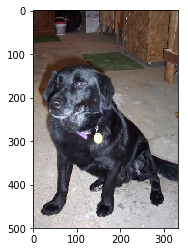

In [2]:
#IMAGE GRAYSCALE BEFORE RESIZE
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras

DIR = "Dataset/PetImages"
CATEGORIES = ["Dog", "Cat"]

import matplotlib.image as mpimg

'''
import matplotlib.pyplot as plt
image = mpimg.imread("Dataset/PetImages/Dog/1.jpg")
'''

for category in CATEGORIES:
    path = os.path.join(DIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = mpimg.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
        
    break

In [3]:
print(img_array.shape)

(500, 333, 3)


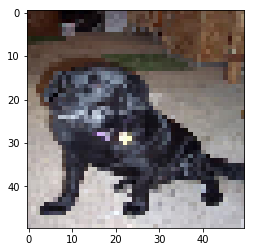

In [4]:
#IMAGE AFTER RESIZE

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [6]:
#LOAD ALL IMAGES INTO ARRAY [training_data] AND CONVERT THEM TO GRAY SCALE
#RESIZE ALL IMAGES TO 50 X 50

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [7]:
print(len(training_data))

24946


In [8]:
#SHUFFLE DATA
'''
Shuffling data prevents the neural net from associating position of Dog/Cat image with it's class_num 
'''

import random
random.shuffle(training_data)


In [50]:
for sample in training_data[:1]:
    print(sample[0]) #array pixel info
    print(sample[1]) #class_num ('Dog' since class_num = 1)

[[[ 53  64  70]
  [ 44  59  65]
  [ 39  48  52]
  ...
  [ 75  65  59]
  [ 85  72  57]
  [ 81  97 107]]

 [[130 128 127]
  [116 119 117]
  [128 132 126]
  ...
  [ 74  59  47]
  [ 44  47  38]
  [ 65  74  62]]

 [[131 132 122]
  [136 137 127]
  [132 132 126]
  ...
  [ 36  36  61]
  [ 79  89 100]
  [ 60  72  88]]

 ...

 [[ 20  14  16]
  [ 15  10  11]
  [ 14  13  15]
  ...
  [ 15  13  11]
  [ 12   9  10]
  [ 13  12  14]]

 [[ 12  12  12]
  [ 10  10  10]
  [ 10  12  12]
  ...
  [ 50  52  52]
  [ 13  13  13]
  [ 29  29  29]]

 [[  5   8   9]
  [ 10   8   5]
  [ 11  10  12]
  ...
  [  9  11  11]
  [  8   7  10]
  [ 13  14  16]]]
0


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X.shape)


(24946, 50, 50, 3)


In [11]:
#SAVING DATA
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
#OPENING DATA
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
y = pickle.load(pickle_in)

[[[255 255 255]
  [255 255 255]
  [202 233 248]
  ...
  [243 252 255]
  [251 251 255]
  [222 229 233]]

 [[255 255 255]
  [255 255 253]
  [199 220 242]
  ...
  [255 255 255]
  [252 255 255]
  [248 252 254]]

 [[255 255 255]
  [253 255 255]
  [193 214 238]
  ...
  [255 255 255]
  [255 255 255]
  [251 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


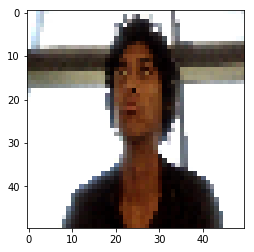

Dog


In [16]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = mpimg.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    print(new_array)
    plt.imshow(new_array)
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = keras.models.load_model('DogsCats.model')

prediction = model.predict([prepare('Sachin.jpg')])
print(CATEGORIES[int(prediction[0][0])])

